<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-Lineal/blob/main/Actividad_6_2_MEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("Datos_limpios_MEX.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [ ]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    24225 non-null  float64
 1   listing_url                                   24225 non-null  object 
 2   last_scraped                                  24225 non-null  object 
 3   source                                        24225 non-null  object 
 4   name                                          24225 non-null  object 
 5   description                                   24225 non-null  object 
 6   neighborhood_overview                         24225 non-null  object 
 7   picture_url                                   24225 non-null  object 
 8   host_url                                      24225 non-null  object 
 9   host_name                                     24225 non-null 

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.“host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”**

In [ ]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  
private_room[['host_acceptance_rate',"host_response_rate"]] = private_room[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

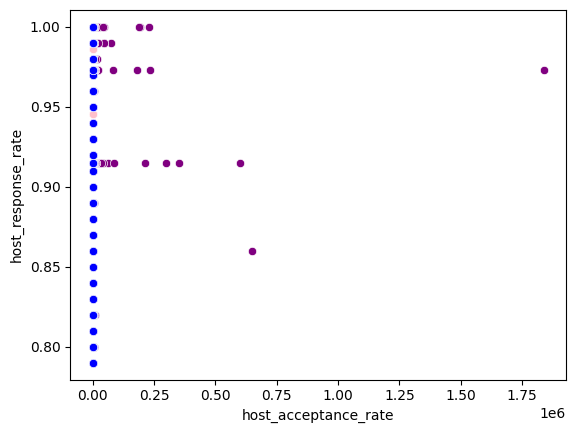

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= private_room['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.97911016e-01, -2.52257605e-08,  1.78771577e-04, -1.48484267e-02]),
 'rank_': 4,
 'singular_': array([2.16083042e+06, 1.91692090e+03, 1.32772150e+01, 2.54041225e+00]),
 'intercept_': 0.8415295235543142}

**Modelo matemático: y= 1.97911016e-01x1 + -2.52257605e-08x2 + 1.78771577e-04x3 + -1.48484267e-02x4 + 90.14555660858437**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.026852141148560382

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.97744265, 0.9589777 , 0.97222111, ..., 0.96937419, 0.95857463,
       0.95856752])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,0.977443,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,https://www.airbnb.com/users/show/299558,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,0.958978,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,https://a0.muscache.com/pictures/10580755/b2dc...,https://www.airbnb.com/users/show/3817743,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,0.972221,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,https://www.airbnb.com/users/show/10659485,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,0.958509,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,https://www.airbnb.com/users/show/3083561,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,0.969358,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

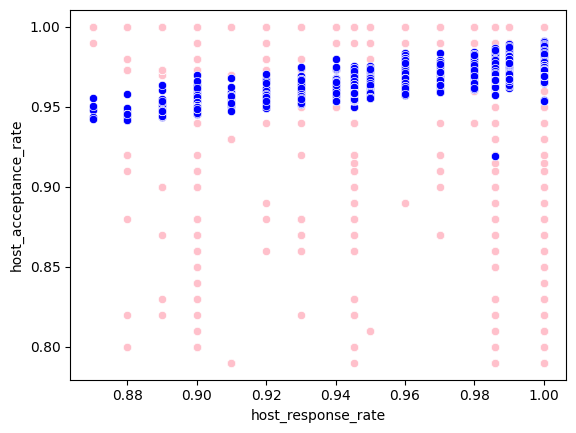

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

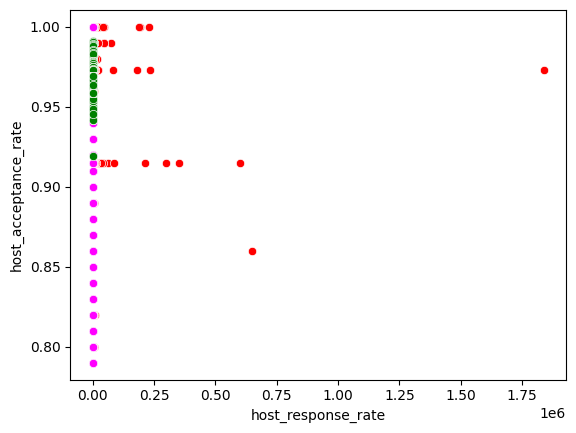

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.026852141148560382
Coeficiente de correlación:  0.1638662294329139


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

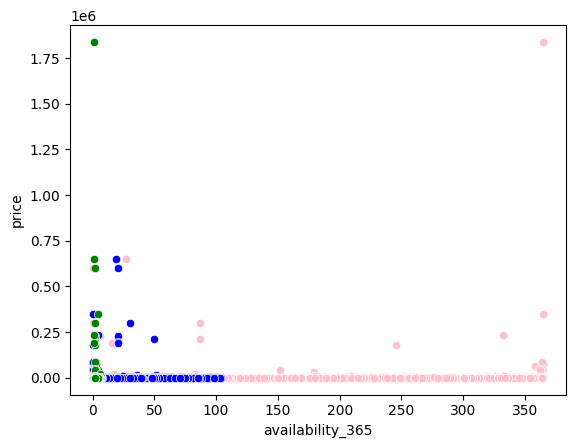

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="green", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= private_room['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -1.44748703, 568.22965627, -13.41899636,  32.5337422 ]),
 'rank_': 4,
 'singular_': array([1.13341946e+04, 1.91190203e+03, 7.98917282e+01, 2.54973215e+00]),
 'intercept_': 1456.3609884316134}

**Modelo matemático: y= -1.44748703x1 + 568.22965627x2+ -13.41899636x3 + 32.5337422x4 + 1456.3609884316134**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.00018421551326941454

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([1014.502533  , 1466.09307187, 1570.98787201, ..., 1590.27510207,
       1531.74056663, 1798.07818105])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,1014.502533,0.977443,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,1466.093072,0.958978,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,https://a0.muscache.com/pictures/10580755/b2dc...,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,1570.987872,0.972221,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,1530.293080,0.958509,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,1962.279270,0.969358,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,https://a0.muscache.com/pictures/837085/b9ed71...,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='availability_365', ylabel='price'>

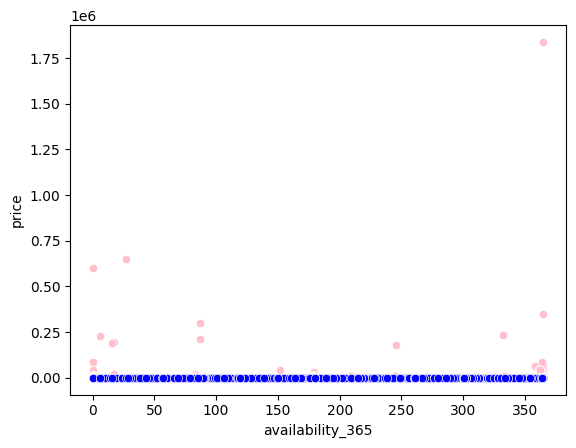

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='availability_365', ylabel='price'>

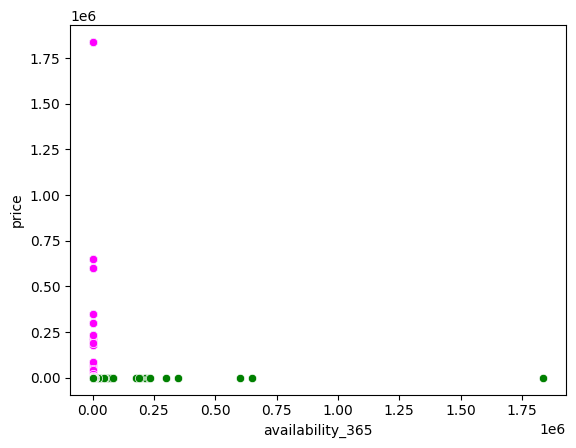

In [ ]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=private_room)
sns.scatterplot(x='price', y='Predicciones', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.00018421551326941454
Coeficiente de correlación:  0.013572601566001064


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

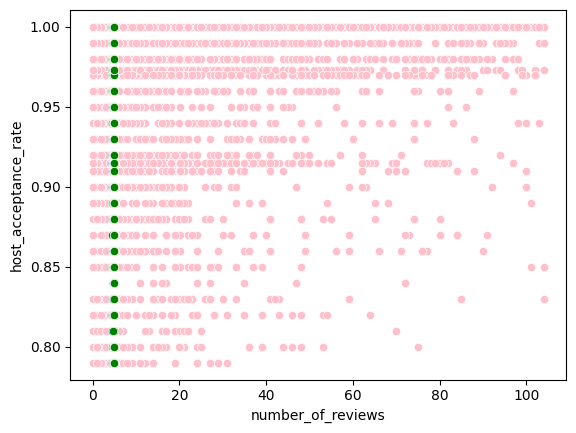

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= private_room['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.0002161 , -0.00433818, -0.00180715]),
 'rank_': 3,
 'singular_': array([1917.04182121,   13.72832528,    7.3373825 ]),
 'intercept_': 0.9933496363257538}

**Modelo matemático: y= 0.0002161x1 + -0.00433818x2 + -0.00180715x3 + 0.9933496363257538**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010564668331892957

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.97654528, 0.96529398, 0.96580018, ..., 0.96405676, 0.96405676,
       0.96405676])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,0.976545,1014.502533,0.977443,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,0.965294,1466.093072,0.958978,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,0.965800,1570.987872,0.972221,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,0.964057,1530.293080,0.958509,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,0.964057,1962.279270,0.969358,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

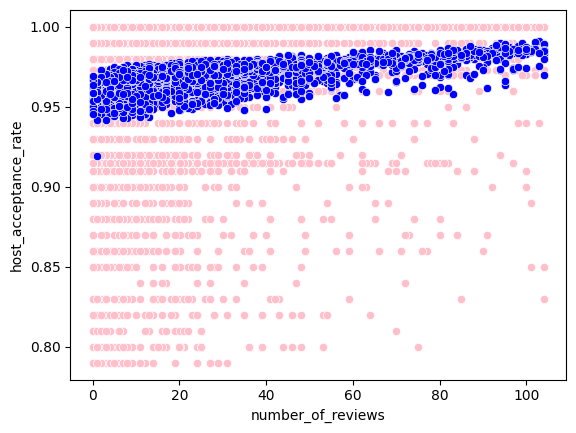

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

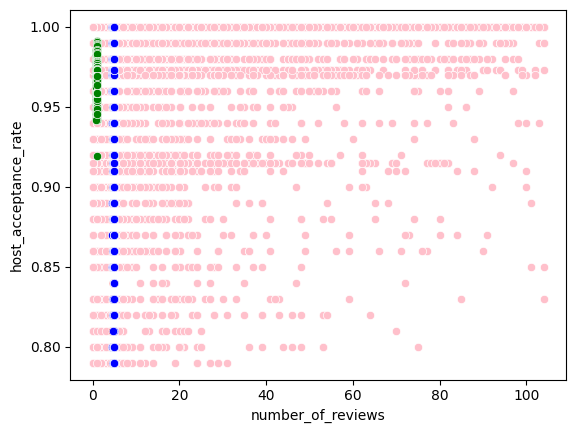

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.010564668331892957
Coeficiente de correlación:  0.10278457244106703


# **Tipo de habitación 2: Entire home/apt.**

In [ ]:
df= pd.read_csv("Datos_limpios_MEX.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [ ]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [ ]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce')
enthome_apt[['host_acceptance_rate',"host_response_rate"]] = enthome_apt[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

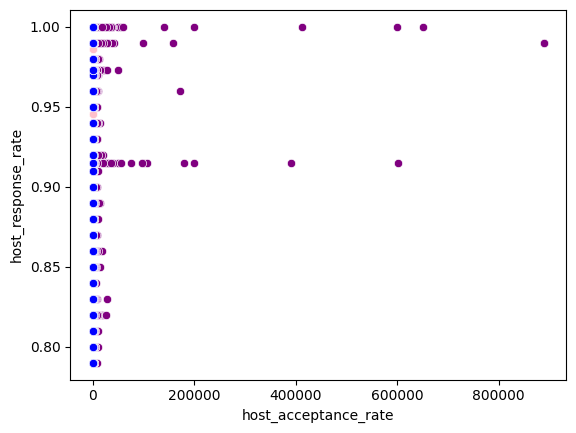

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=enthome_apt)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= enthome_apt['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.17197584e-01, -1.00834090e-08,  1.23100925e-04, -4.88579925e-03]),
 'rank_': 4,
 'singular_': array([1.82845449e+06, 3.04324770e+03, 1.80798423e+01, 2.91067613e+00]),
 'intercept_': 0.5839431273540848}

**Modelo matemático: y= 4.17197584e-01x1 + -1.00834090e-08x2 + 1.23100925e-04x3 + -4.88579925e-03x4 + 0.5839431273540848**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06727718302383456

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.97952666, 0.96216129, 0.98359873, ..., 0.9552913 , 0.97807861,
       0.95528929])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.979527,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,0.962161,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,0.983599,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,0.955270,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,0.986461,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

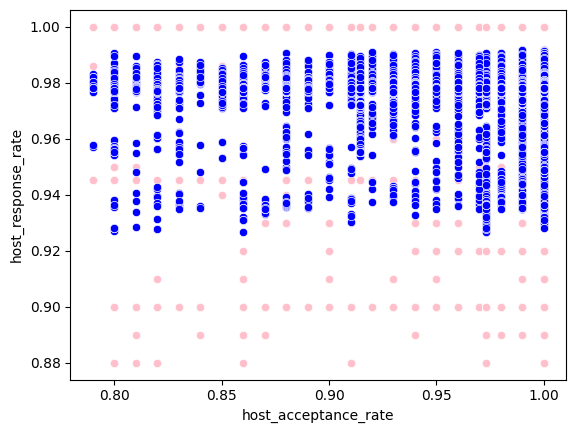

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

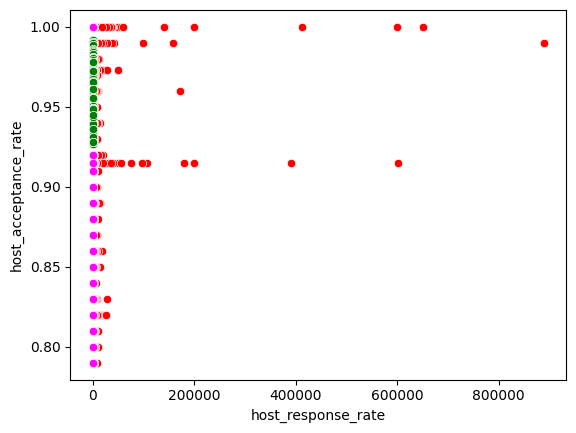

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.06727718302383456
Coeficiente de correlación:  0.2593784552036552


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

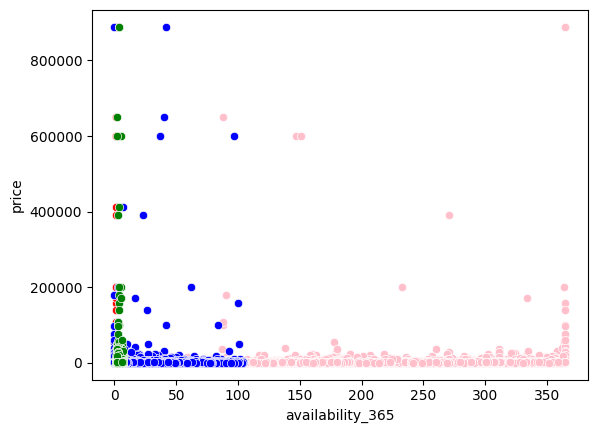

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="green", data=enthome_apt)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= enthome_apt['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.91040103e-01, -1.00963732e+04,  6.63729846e-01,  2.15436449e+02]),
 'rank_': 4,
 'singular_': array([1.53873574e+04, 3.03700998e+03, 1.72154458e+02, 2.91157256e+00]),
 'intercept_': 11194.520163669176}

**Modelo matemático: y= 5.91040103e-01x1 + -1.00963732e+04x2+ 6.63729846e-01x3 + 2.15436449e+02x4 + 11194.520163669176**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0006637059376128907

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([1949.89162534, 2325.39258538, 2468.07160572, ..., 3373.31707269,
       1732.33765143, 3154.33438288])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1949.891625,0.979527,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,2325.392585,0.962161,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2468.071606,0.983599,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,2294.952746,0.955270,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,1976.392687,0.986461,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='availability_365', ylabel='price'>

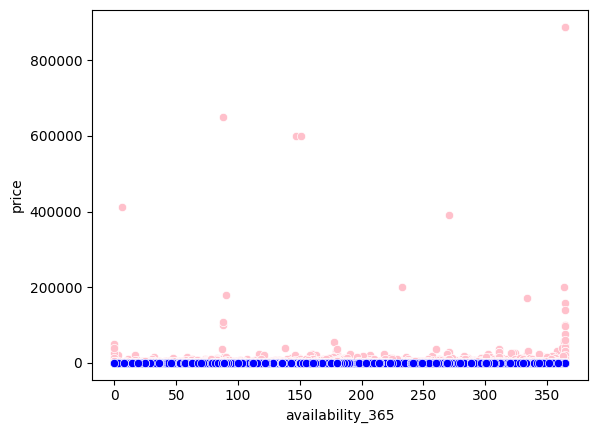

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='availability_365', ylabel='price'>

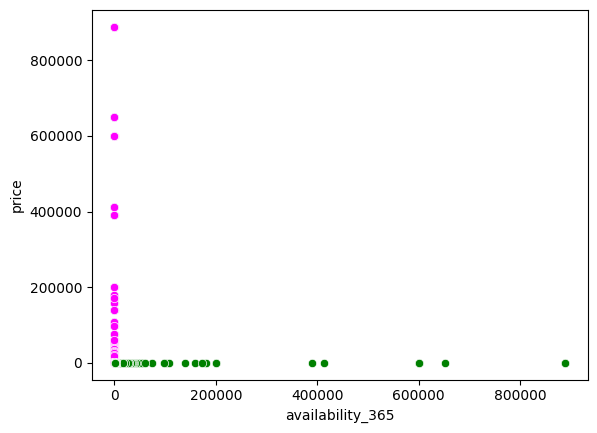

In [ ]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=enthome_apt)
sns.scatterplot(x='price', y='Predicciones', color="green", data=enthome_apt)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0006637059376128907
Coeficiente de correlación:  0.02576249090466391


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

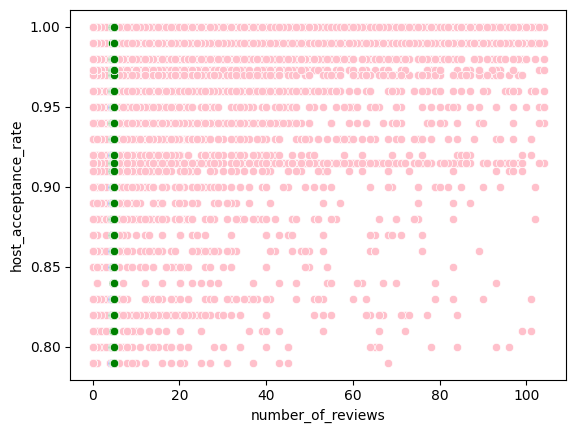

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=enthome_apt)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= enthome_apt['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.0001707 ,  0.00886669, -0.00298158]),
 'rank_': 3,
 'singular_': array([3043.24778973,   18.27790584,   10.39069101]),
 'intercept_': 0.9435067016176633}

**Modelo matemático: y= 0.0001707x1 + 0.00886669x2 + -0.00298158x3 + 0.9435067016176633**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010991997296817768

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.97622272, 0.98228109, 0.97725682, ..., 0.97123311, 0.97123311,
       0.97123311])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.976223,1949.891625,0.979527,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,0.982281,2325.392585,0.962161,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,0.977257,2468.071606,0.983599,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,0.971233,2294.952746,0.955270,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,0.981853,1976.392687,0.986461,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

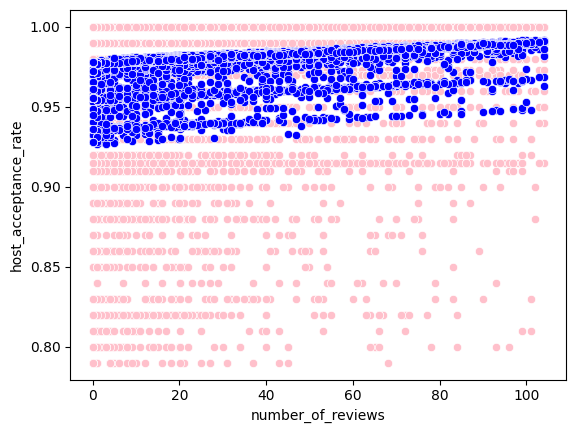

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

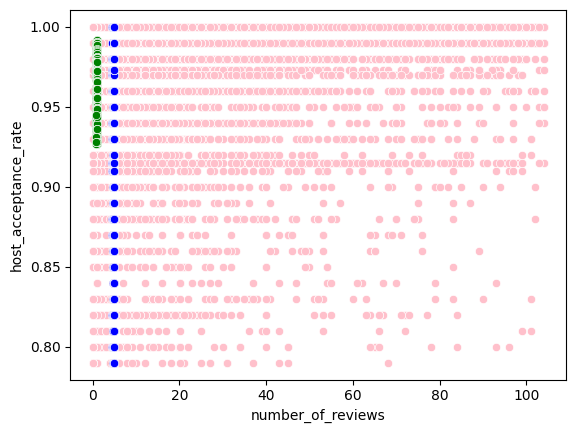

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.010991997296817768
Coeficiente de correlación:  0.1048427264850441
